# Demo 7: validating the area elements in PyPO

In this notebook, we will investigate and validate the way that `PyPO` calculates area elements. For a more mathematical description of how the elements are calculated, have a look at the "Gridding And Parameterisations" page of the documentation. Here, we will simply check some aspects.

For the first experiment, we generate quadrics at several $uv$-eccentricities and rotation angles, to see if the total area is invariant for different rotation angles. This should hold, as long as we center the $uv$ ellipse on the origin, and as long is the quadrics represent strict surfaces of revolution. We start with paraboloids.

2024-07-16 15:33:31 - WARNING - System override set to True. 
2024-07-16 15:33:31 - INFO - EXITING SYSTEM. 
0.0008033769146936225
2024-07-16 15:33:31 - INFO - Added paraboloid parabola to system. 
[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.001 0.001 0.001 ... 0.001 0.001 0.001]
 [0.002 0.002 0.002 ... 0.002 0.002 0.002]
 ...
 [0.998 0.998 0.998 ... 0.998 0.998 0.998]
 [0.999 0.999 0.999 ... 0.999 0.999 0.999]
 [1.    1.    1.    ... 1.    1.    1.   ]]


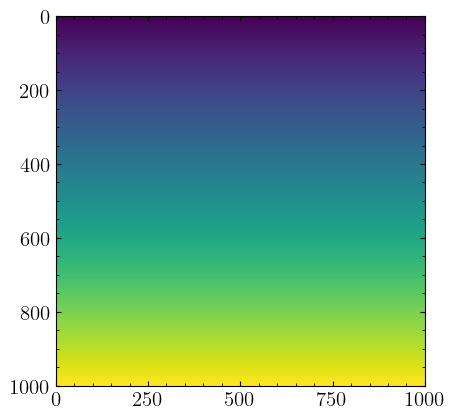

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.60000720e-07 3.60000720e-07 3.60000720e-07 ... 3.60000720e-07
  3.60000720e-07 3.60000720e-07]
 [7.20005760e-07 7.20005760e-07 7.20005760e-07 ... 7.20005760e-07
  7.20005760e-07 7.20005760e-07]
 ...
 [8.02089361e-04 8.02089361e-04 8.02089361e-04 ... 8.02089361e-04
  8.02089361e-04 8.02089361e-04]
 [8.03536208e-04 8.03536208e-04 8.03536208e-04 ... 8.03536208e-04
  8.03536208e-04 8.03536208e-04]
 [8.04984472e-04 8.04984472e-04 8.04984472e-04 ... 8.04984472e-04
  8.04984472e-04 8.04984472e-04]]
0.0
0.0003055072723362588


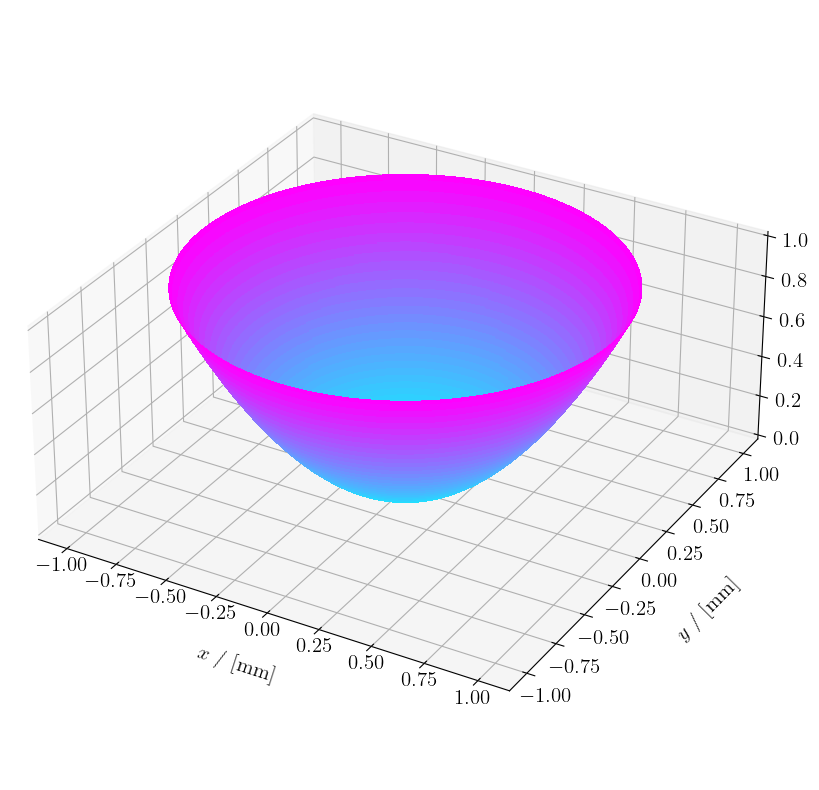

In [ ]:
import matplotlib.pyplot as pt

import numpy as np
from pathlib import Path

from PyPO.System import System


# Define function for generating dA
dA_par = lambda u, v, a, b, du, dv : u*np.sqrt(4*b**2*u**2*np.sin(v)**2 + 4*a**2*u**2*np.cos(v)**2 + a**2*b**2)*du*dv

s = System()

D = 100 # Distance between point source and upper screen.

a_par = 1
b_par = 1

u_max = 1
v_max = 360

N = 1001

du_par = u_max/N
dv_par = v_max/N

print(dA_par(u_max, v_max, a_par, b_par, du_par, dv_par))

coeffs = np.array([a_par,b_par])
    
parabola = {
            "name"      : "parabola",
            "gmode"     : "uv",
            "pmode"     : "manual",
            "coeffs"    : coeffs,
            #"ecc_uv"    : 0.5,
            #"rot_uv"    : 55,
            "lims_u"    : np.array([0, u_max]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([1001, 1000])
            }

s.addParabola(parabola)
grids = s.generateGrids("parabola")
print(np.sqrt(grids.x**2 + grids.y**2))
pt.imshow(np.sqrt(grids.x**2 + grids.y**2))
pt.show()
print(grids.area)

area_tot = np.sum(grids.area) / (N*N)
print(np.min(grids.area))
print(area_tot)
s.plotSystem()